In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [4]:
sc = MinMaxScaler()
df['tenure'] = sc.fit_transform(df[['tenure']])
df['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = sc.fit_transform(df[['TotalCharges']])

In [5]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Logistic Regression
def logistic_regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(max_iter=200) 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred, clf

# Random Forest
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred, clf

# Decision Tree
def decision_tree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=42, max_depth=10) 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred, clf

# Support Vector Machine (SVM)
def svm_model(X_train, X_test, y_train, y_test):
    clf = SVC(kernel='linear')  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred, clf

# Naive Bayes
def naive_bayes(X_train, X_test, y_train, y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred, clf


In [8]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Return the evaluation metrics
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# List to store results for each model
results = []

# Logistic Regression
y_pred_lr, lr_model = logistic_regression(X_train, X_test, y_train, y_test)
results.append(evaluate_model(y_test, y_pred_lr, 'Logistic Regression'))

# Random Forest
y_pred_rf, rf_model = random_forest(X_train, X_test, y_train, y_test)
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))

# Decision Tree
y_pred_dt, dt_model = decision_tree(X_train, X_test, y_train, y_test)
results.append(evaluate_model(y_test, y_pred_dt, 'Decision Tree'))

# Support Vector Machine
y_pred_svm, svm_model = svm_model(X_train, X_test, y_train, y_test)
results.append(evaluate_model(y_test, y_pred_svm, 'Support Vector Machine'))

# Naive Bayes
y_pred_nb, nb_model = naive_bayes(X_train, X_test, y_train, y_test)
results.append(evaluate_model(y_test, y_pred_nb, 'Naive Bayes'))


In [9]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.815472   0.677116  0.579088  0.624277
1           Random Forest  0.796309   0.660448  0.474531  0.552262
2           Decision Tree  0.767211   0.559682  0.565684  0.562667
3  Support Vector Machine  0.816891   0.680251  0.581769  0.627168
4             Naive Bayes  0.757984   0.529304  0.774799  0.628945


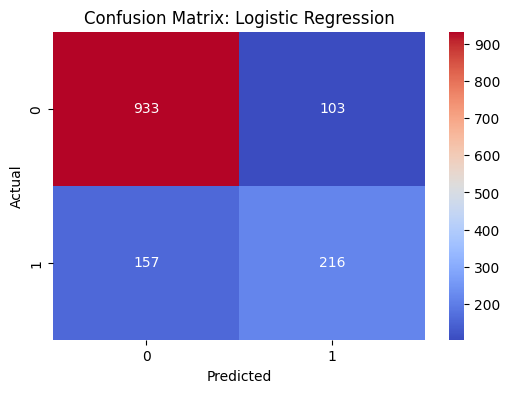

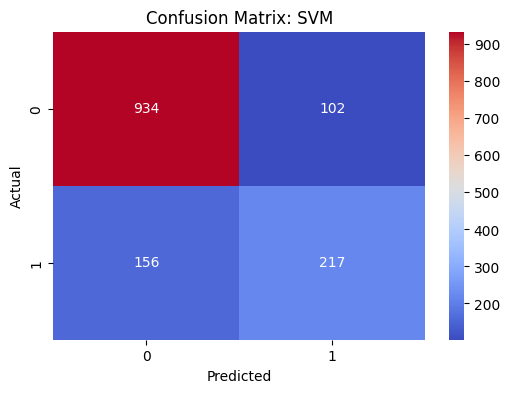

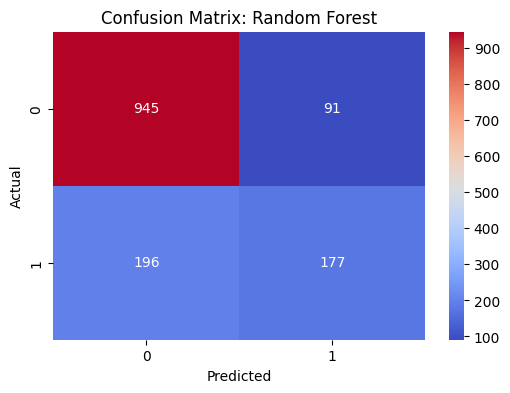

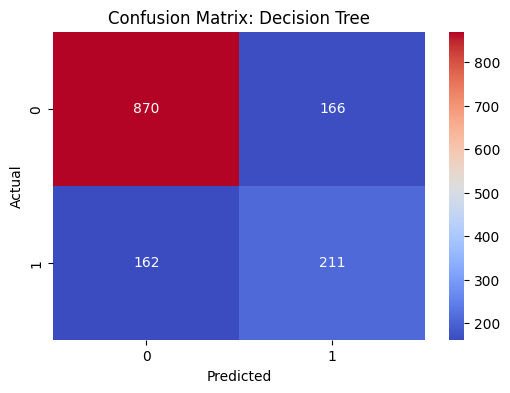

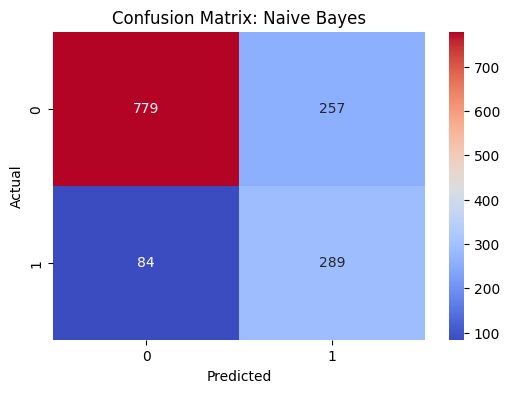

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = y_test


model_predictions = {
    'Logistic Regression': y_pred_lr,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt,
    'Naive Bayes': y_pred_nb
}

# Plot confusion matrices in a loop
for model, y_pred in model_predictions.items():
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix: {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

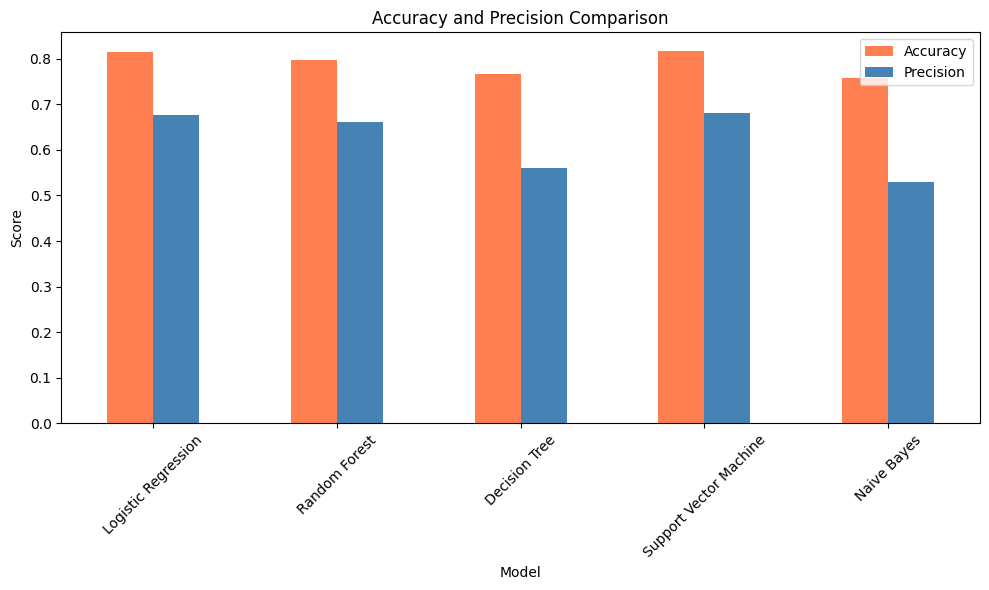

In [11]:
results_df = pd.DataFrame(results)

results_df.set_index('Model', inplace=True)

results_df[['Accuracy', 'Precision']].plot(kind='bar', color=['#FF7F50', '#4682B4'], figsize=(10,6))
plt.title('Accuracy and Precision Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

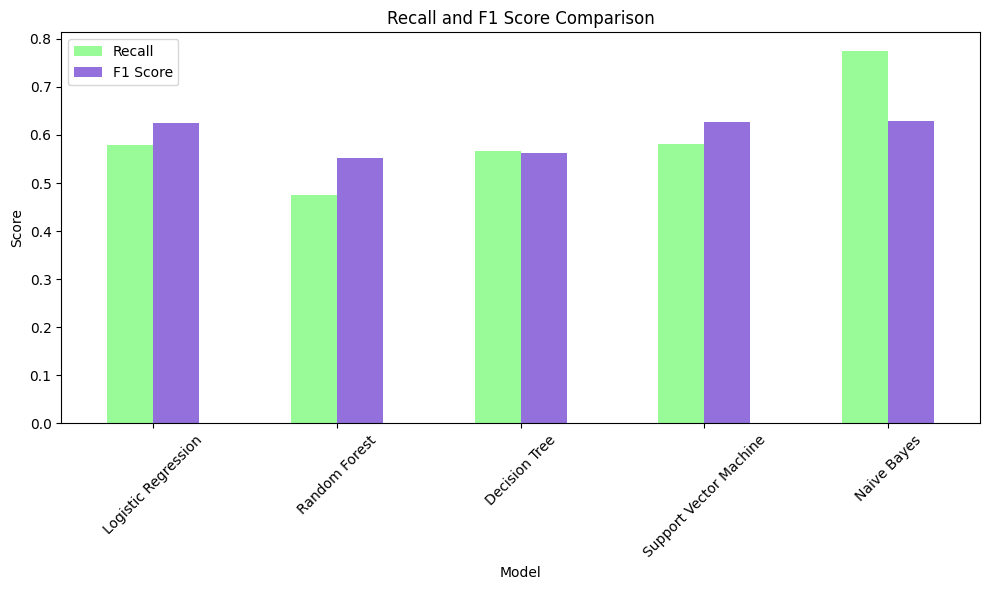

In [12]:
# Plot recall and f1_score comparison
results_df[['Recall', 'F1 Score']].plot(kind='bar', color=['#98FB98', '#9370DB'], figsize=(10,6))
plt.title('Recall and F1 Score Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

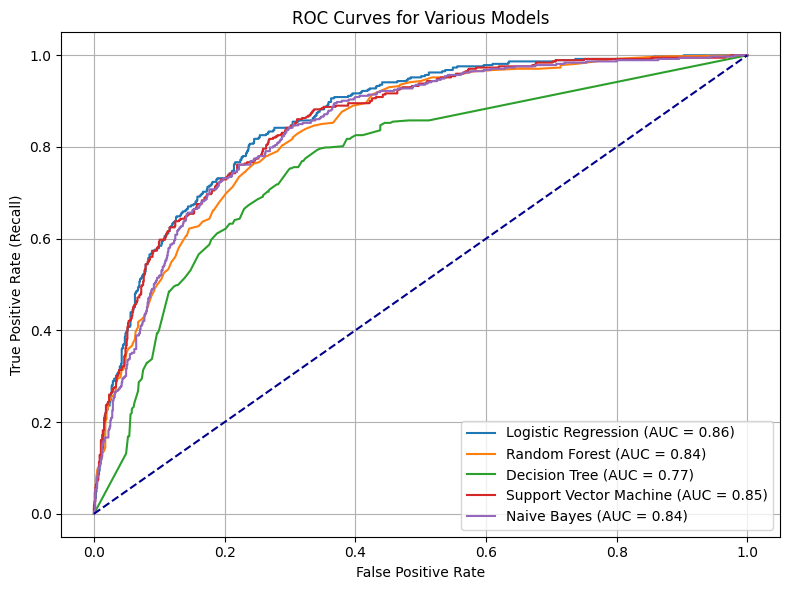

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot the ROC curve for each model
def plot_roc_auc(model_name, y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.figure(figsize=(8, 6))

# Logistic Regression
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]  
plot_roc_auc('Logistic Regression', y_test, y_pred_prob_lr)

# Random Forest
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1] 
plot_roc_auc('Random Forest', y_test, y_pred_prob_rf)

# Decision Tree
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1] 
plot_roc_auc('Decision Tree', y_test, y_pred_prob_dt)

# Support Vector Machine (SVM)
y_pred_prob_svm = svm_model.decision_function(X_test)
plot_roc_auc('Support Vector Machine', y_test, y_pred_prob_svm)

# Naive Bayes
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1] 
plot_roc_auc('Naive Bayes', y_test, y_pred_prob_nb)


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('ROC Curves for Various Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
